<h2 align="center">Predict Used Car Price

In [1]:
import numpy as np
import pandas as pd

# Import dữ liệu

In [2]:
header = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels',
         'engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders',
          'engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg',
         'highway-mpg','price']

data = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data',names = header)

In [3]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Kiểm tra kiểu dữ liệu

In [4]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

**Các trường dữ liệu như: *bore, stroke, horsepower, peak-rpm* và *price* bị định dạng sai dữ liệu, cần chuyển đổi về dữ liệu dạng số**

In [5]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


# Làm sạch dữ liệu

**Kiểm tra dữ liệu có chứa giá trị null hay không?**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

**Dữ liệu không chứa giá trị null**

**Kiểm tra dữ liệu có chứa các giá trị không đúng quy chuẩn không?**

In [7]:
data == "?"

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Trong dữ liệu có chứa ký tự "?", thực hiện thay thế ký tự "?" bằng giá trị null để tiện cho việc xử lý dữ liệu

In [8]:
data = data.replace('?',np.nan)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

**Cột price là đối tượng cần dự đoán, nên sẽ xóa đi các bản ghi mà cột price nhận giá trị Nan**

In [10]:
data.dropna(subset=["price"], axis=0,inplace=True)

In [11]:
data[data.price.isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [12]:
data['price'] = data['price'].astype('float64')

**Thay thế các dữ liệu Null trong trường normalized-losses, bore, stroke, horsepower, peak-rpm bằng mean tương ứng**

In [13]:
A = ['normalized-losses','bore','stroke','horsepower','peak-rpm']

for i in A:
    data[i] = data[i].astype('float64')
    mean = data[i].mean()
    data[i] = data[i].replace(np.nan,mean)

**Thay thế các dữ liệu Null trong trường num-of-doors bằng mode tương ứng**

In [14]:
mode = data['num-of-doors'].mode()[0]

In [15]:
data['num-of-doors'].fillna(mode, inplace = True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

**Dữ liệu không còn chứa giá trị null và đã đưa về kiểu dữ liệu phù hợp**

In [17]:
data.reset_index(drop=True,inplace=True)
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


# Data Formatting

In [18]:
data['city-mpg'] = 235/data['city-mpg']

data.rename(columns = {'city-mpg':'city-L/100km'}, inplace = True)

In [19]:
data['highway-mpg'] = 235/data['highway-mpg']

data.rename(columns = {'highway-mpg':'highway-L/100km'}, inplace = True)

In [20]:
data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450.0


# Kiểm tra mối tương quan của các biến

In [21]:
data.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.075790,0.279719,0.066171,-0.029807,-0.082391
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.217300,0.239544,0.238567,0.181189,0.133999
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.250313,0.371250,-0.360233,0.476153,0.577576,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.159733,0.579731,-0.286035,0.657373,0.707108,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,0.189867,0.615006,-0.245852,0.673363,0.736728,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,0.259737,-0.086941,-0.309913,0.003811,0.084301,0.135486
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,0.156433,0.757994,-0.279350,0.785353,0.836921,0.834415
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,0.028889,0.822649,-0.256753,0.745059,0.783465,0.872335
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,0.001250,0.566838,-0.267338,0.554726,0.559197,0.543154
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,0.097815,-0.063720,0.036285,0.047199,0.082267


**Lấy những biến có correlation với price lớn hơn 0.7 để đưa vào mô hình**

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

### **Đánh giá mức độ tương quan giữa length và price**

<AxesSubplot:xlabel='length', ylabel='price'>

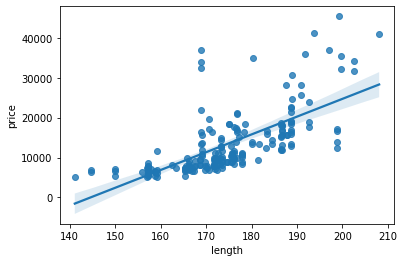

In [23]:
sns.regplot(x="length", y="price", data=data)

In [24]:
pearson_coef, p_value = stats.pearsonr(data['length'], data['price'])
print("Correlation Coefficient là", pearson_coef, "và giá trị P-value là ", p_value)

Correlation Coefficient là 0.6906283804483642 và giá trị P-value là  8.016477466158759e-30


**Nhận xét:** length và price có mối quan hệ tuyến tính đồng biến và p_value < 0.001 cho thấy mức độ tương quan của hai biến này có ý nghĩa thống kê. Có thể sử dụng biến length để dự báo cho biến price

### **Đánh giá mức độ tương quan giữa width và price**

<AxesSubplot:xlabel='width', ylabel='price'>

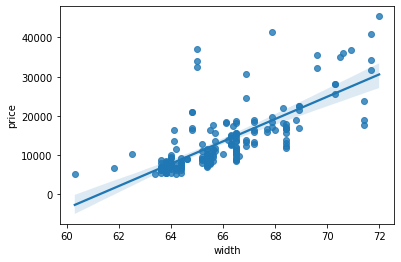

In [25]:
sns.regplot(x="width", y="price", data=data)

In [26]:
pearson_coef, p_value = stats.pearsonr(data['width'], data['price'])
print("Correlation Coefficient là", pearson_coef, "và giá trị P-value là ", p_value)

Correlation Coefficient là 0.7512653440522676 và giá trị P-value là  9.2003355104806e-38


**Nhận xét:** width và price có mối quan hệ tuyến tính đồng biến và p_value < 0.001 cho thấy mức độ tương quan của hai biến này có ý nghĩa thống kê. Có thể sử dụng biến width để dự báo cho biến price.

### Đánh giá mức độ tương quan giữa curb-weight và price

<AxesSubplot:xlabel='curb-weight', ylabel='price'>

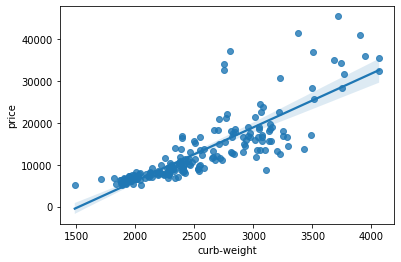

In [27]:
sns.regplot(x="curb-weight", y="price", data=data)

In [28]:
pearson_coef, p_value = stats.pearsonr(data['curb-weight'], data['price'])
print("Correlation Coefficient là", pearson_coef, "và giá trị P-value là ", p_value)

Correlation Coefficient là 0.8344145257702843 và giá trị P-value là  2.189577238894065e-53


**Nhận xét:** curb-weight và price có mối quan hệ tuyến tính đồng biến và p_value < 0.001 cho thấy mức độ tương quan của hai biến này có ý nghĩa thống kê. Có thể sử dụng biến curb-weight để dự báo cho biến price.

### Đánh giá mức độ tương quan giữa engine-size và price

<AxesSubplot:xlabel='engine-size', ylabel='price'>

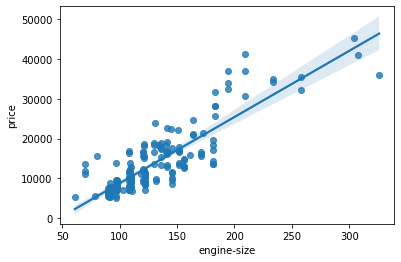

In [29]:
sns.regplot(x="engine-size", y="price", data=data)

In [30]:
pearson_coef, p_value = stats.pearsonr(data['engine-size'], data['price'])
print("Correlation Coefficient là", pearson_coef, "và giá trị P-value là ", p_value)

Correlation Coefficient là 0.8723351674455182 và giá trị P-value là  9.265491622200232e-64


**Nhận xét:** engine-size và price có mối quan hệ tuyến tính đồng biến và p_value < 0.001 cho thấy mức độ tương quan của hai biến này có ý nghĩa thống kê. Có thể sử dụng biến engine-size để dự báo cho biến price.

### Đánh giá mức độ tương quan giữa horsepower và price

<AxesSubplot:xlabel='horsepower', ylabel='price'>

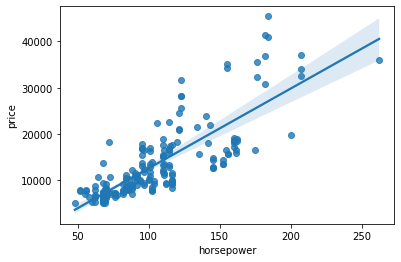

In [31]:
sns.regplot(x="horsepower", y="price", data=data)

In [32]:
pearson_coef, p_value = stats.pearsonr(data['horsepower'], data['price'])
print("Correlation Coefficient là", pearson_coef, "và giá trị P-value là ", p_value)

Correlation Coefficient là 0.8096811975632288 và giá trị P-value là  6.058444649710002e-48


**Nhận xét:** horsepower và price có mối quan hệ tuyến tính đồng biến và p_value < 0.001 cho thấy mức độ tương quan của hai biến này có ý nghĩa thống kê. Có thể sử dụng biến horsepower để dự báo cho biến price.

### Đánh giá mức độ tương quan giữa city-L/100km và price

<AxesSubplot:xlabel='city-L/100km', ylabel='price'>

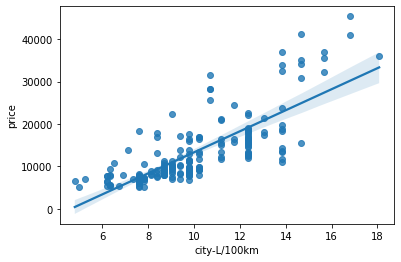

In [33]:
sns.regplot(x="city-L/100km", y="price", data=data)

In [34]:
pearson_coef, p_value = stats.pearsonr(data['city-L/100km'], data['price'])
print("Correlation Coefficient là", pearson_coef, "và giá trị P-value là ", p_value)

Correlation Coefficient là 0.7898975136626943 và giá trị P-value là  3.903106400939802e-44


**Nhận xét:** city-L/100km và price có mối quan hệ tuyến tính đồng biến và p_value < 0.001 cho thấy mức độ tương quan của hai biến này có ý nghĩa thống kê. Có thể sử dụng biến city-L/100km để dự báo cho biến price.

 ### Đánh giá mức độ tương quan giữa highway-L/100km và price

<AxesSubplot:xlabel='highway-L/100km', ylabel='price'>

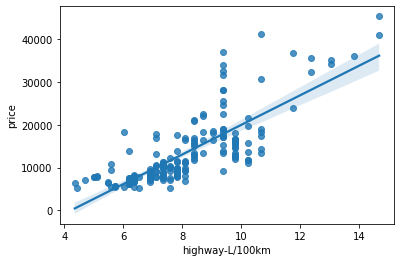

In [35]:
sns.regplot(x="highway-L/100km", y="price", data=data)

In [36]:
pearson_coef, p_value = stats.pearsonr(data['highway-L/100km'], data['price'])
print("Correlation Coefficient là", pearson_coef, "và giá trị P-value là ", p_value)

Correlation Coefficient là 0.8011176263981973 và giá trị P-value là  3.0467845810415427e-46


**Nhận xét:** highway-L/100km và price có mối quan hệ tuyến tính đồng biến và p_value < 0.001 cho thấy mức độ tương quan của hai biến này có ý nghĩa thống kê. Có thể sử dụng biến highway-L/100km để dự báo cho biến price.

# Xây dựng model

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [38]:
X = data[['length','width','curb-weight','engine-size','horsepower','city-L/100km','highway-L/100km']]
y = data['price']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = lin_reg.predict(X_test)

In [42]:
y_pred

array([ 4625.02102164, 10753.33289125, 19287.79899062, 21854.83254503,
       19353.37962756,  9754.18143822, 15312.68134076,  5532.62580886,
       16813.90803298,  7201.81121585, 12067.48904721, 20731.92718544,
        7323.20101793,  8567.50327193, 18377.88637885, 19387.44104276,
        6495.91164002, 13856.28442472,  9847.03689503,  6263.41904068,
        7578.67814545, 12322.19329703, 34098.04664228,  7502.28702569,
       10629.82190839, 20588.28209135,  9538.71379709,  9964.70538932,
       18382.79456195, 34098.04664228, 28728.16358255, 11515.41508749,
        7568.05415765, 19467.35535823,  8305.88649602, 11766.4328063 ,
       13817.10848997, 17069.92254942, 11609.84422654, 17312.18426594,
        6568.26538255])

In [43]:
intercept = lin_reg.intercept_

In [44]:
slopes = lin_reg.coef_

In [45]:
intercept

-46241.32240721797

In [46]:
slopes

array([-17.77495247, 566.50792166,   3.26466123,  83.85021847,
        -4.40156407, 421.61110616, 300.78729419])

**Mô Hình có dạnh như sau:**

In [47]:
print('price = -46241.322 - 17.774*length + 566.507*width + 3.264*curb-weight + 83.850*engine-size - 4.401*horsepower + 421.611*city-L/100km + 300.787*highway-L/100km')

price = -46241.322 - 17.774*length + 566.507*width + 3.264*curb-weight + 83.850*engine-size - 4.401*horsepower + 421.611*city-L/100km + 300.787*highway-L/100km


In [48]:
lin_reg.score(X,y)

0.8117073561626547

**Mức độ chính xác của mô hình là 81.17%**